# Project  Creator - Mrs.Vandana Anil Kadam

#Import necessary libraries

#Problem Statement-
#Description of companies and their status which  we used a Investments_VC dataset with information on 54,000 companies. The four original classification in the dataset were "closed," "operating," and "acquired","zero";  in order to predict operating class according to the target attribute "status".
##Problem Statement-This dataset is a classification problem consist wheather four classes how much covered start-ups till 2014.How much covered each class in start-ups companies belonging the provided dataset.

#Reading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


In [ ]:
vc=pd.read_csv("/content/investments_VC.csv",encoding='latin-1')
vc.head(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Observations:

#There are companies from 1902 to 2014.
#75% of the companies are very new and were established after 2006

In [ ]:
vc.shape

(54294, 39)

#Basic_EDA

In [ ]:
#all columns we can see here
vc.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [ ]:
#more information about dataset attributes
vc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49439 entries, 0 to 49438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49439 non-null  float64
 1   name                  49439 non-null  float64
 2   homepage_url          49439 non-null  float64
 3   category_list         49439 non-null  float64
 4   market                49439 non-null  float64
 5   funding_total_usd     49439 non-null  float64
 6   status                49439 non-null  int8   
 7   country_code          49439 non-null  float64
 8   state_code            49439 non-null  float64
 9   region                49439 non-null  float64
 10  city                  49439 non-null  float64
 11  funding_rounds        49439 non-null  float64
 12  founded_at            49439 non-null  float64
 13  founded_month         49439 non-null  float64
 14  founded_quarter       49439 non-null  float64
 15  founded_year       

In [ ]:
len(vc)

54294

#Numerical features of our dataset

In [ ]:
#Describing  numerical data
vc.describe(include=[np.number])

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


#Categorical features in dataset

In [ ]:
#Describing non numerical data(categorical features)
vc.describe(exclude=[np.number])

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
count,49438,49437,45989,45477,45470,49438,48124,44165,30161,44165,43322,38554,38482,38482,49438,49438
unique,49436,49350,45850,16675,753,14617,3,115,61,1089,4188,3369,420,218,3914,3657
top,/organization/treasure-valley-urology-services,Roost,http://spaceport.io,|Software|,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2012-01-01,2012-01,2012-Q1,2012-01-01,2013-01-01
freq,2,4,2,3650,4620,8531,41829,28793,9917,6804,2615,2181,2327,2904,468,387


In [ ]:
#Setting decimal format
#Suppose we only concern 2 digits after the decimal point, we can use this option to format the display as follows:
pd.set_option('display.float_format',  '{:,.2f}'.format)


In [ ]:
#information about each and every atrributes in stastical format(integer values in  format_specification details)
vc.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,"49,438.00",1.70,1.29,1.00,1.00,1.00,2.00,18.00
founded_year,"38,482.00","2,007.36",7.58,"1,902.00","2,006.00","2,010.00","2,012.00","2,014.00"
seed,"49,438.00","217,321.50","1,056,984.82",0.00,0.00,0.00,"25,000.00","130,000,000.00"
venture,"49,438.00","7,501,050.54","28,471,124.16",0.00,0.00,0.00,"5,000,000.00","2,351,000,000.00"
equity_crowdfunding,"49,438.00","6,163.32","199,904.82",0.00,0.00,0.00,0.00,"25,000,000.00"
undisclosed,"49,438.00","130,221.28","2,981,403.65",0.00,0.00,0.00,0.00,"292,432,833.00"
convertible_note,"49,438.00","23,364.10","1,432,045.73",0.00,0.00,0.00,0.00,"300,000,000.00"
debt_financing,"49,438.00","1,888,156.89","138,204,566.17",0.00,0.00,0.00,0.00,"30,079,503,000.00"
angel,"49,438.00","65,418.98","658,290.79",0.00,0.00,0.00,0.00,"63,590,263.00"
grant,"49,438.00","162,845.28","5,612,088.00",0.00,0.00,0.00,0.00,"750,500,000.00"


#missing values

In [ ]:
#let's see how many nulls/missing values in our dataset percentages of each column
vc.isnull().mean()*100

permalink               8.94
name                    8.95
homepage_url           15.30
category_list          16.24
 market                16.25
 funding_total_usd      8.94
status                 11.36
country_code           18.66
state_code             44.45
region                 18.66
city                   20.21
funding_rounds          8.94
founded_at             28.99
founded_month          29.12
founded_quarter        29.12
founded_year           29.12
first_funding_at        8.94
last_funding_at         8.94
seed                    8.94
venture                 8.94
equity_crowdfunding     8.94
undisclosed             8.94
convertible_note        8.94
debt_financing          8.94
angel                   8.94
grant                   8.94
private_equity          8.94
post_ipo_equity         8.94
post_ipo_debt           8.94
secondary_market        8.94
product_crowdfunding    8.94
round_A                 8.94
round_B                 8.94
round_C                 8.94
round_D       

In [ ]:
vc.isnull()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54290,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54291,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
54292,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
vc.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#check sum of all nulls
vc.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

# Missing values showing through visuailization

<AxesSubplot:>

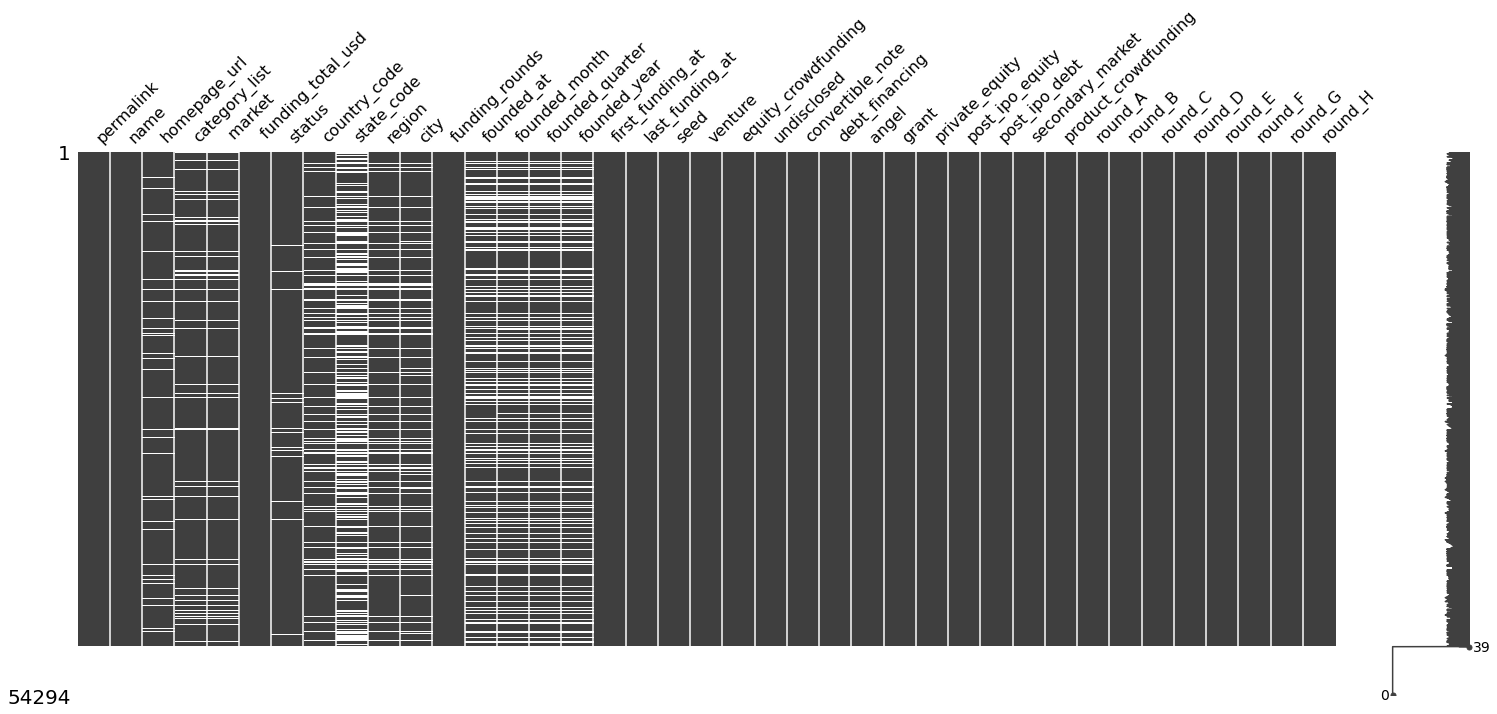

In [ ]:
#visualization of missing values using missingno
msno.matrix(vc)

<AxesSubplot:>

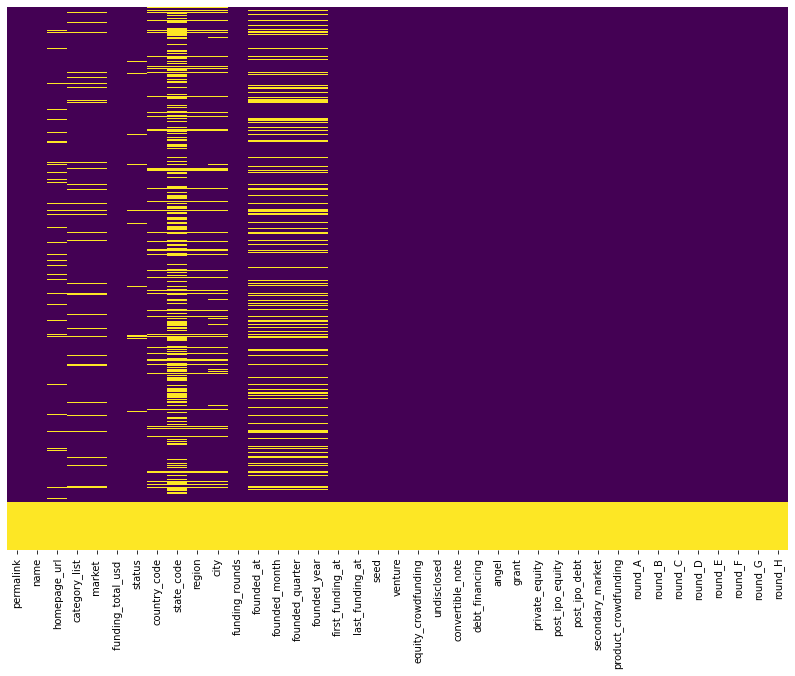

In [ ]:
#visualization of missing values using seaborn library
plt.figure(figsize=(14,10))
sns.heatmap(vc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
vc.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vc.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#corelation metrics

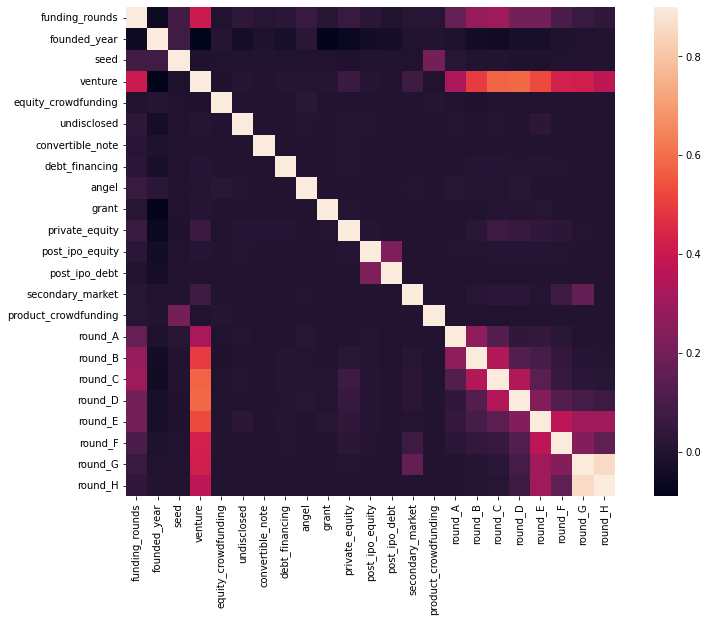

                      funding_rounds  founded_year  seed  venture  \
funding_rounds                  1.00         -0.06  0.09     0.40   
founded_year                   -0.06          1.00  0.08    -0.09   
seed                            0.09          0.08  1.00    -0.01   
venture                         0.40         -0.09 -0.01     1.00   
equity_crowdfunding            -0.00          0.01 -0.00    -0.01   
undisclosed                     0.03         -0.04 -0.00     0.01   
convertible_note                0.02         -0.01 -0.00     0.00   
debt_financing                  0.02         -0.03 -0.00     0.01   
angel                           0.06          0.02 -0.00     0.01   
grant                           0.01         -0.09 -0.01     0.01   
private_equity                  0.06         -0.06 -0.01     0.06   
post_ipo_equity                 0.02         -0.04 -0.00     0.01   
post_ipo_debt                  -0.00         -0.03 -0.00    -0.00   
secondary_market                0.

In [ ]:
#corelation metrics
corelation_metrics=vc.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(corelation_metrics,vmax=.9,square=True)#annot=value
plt.show()
print(corelation_metrics)

In [ ]:
#which data types in our dataset's attributes.
vc.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

# Visualization of features

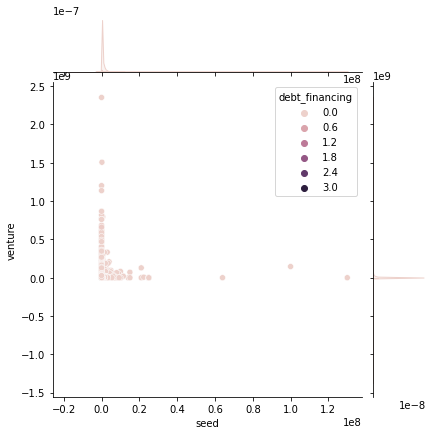

In [ ]:
sns.jointplot(x="seed",y="venture",hue="debt_financing",data=vc)
plt.show()

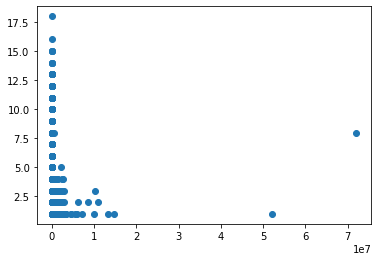

In [ ]:
plt.scatter(x="product_crowdfunding",y="funding_rounds",data=vc)
plt.show()

#Target variable-"Status"

In [ ]:
len(vc["status"].unique())

4

In [ ]:
vc["status"].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [ ]:
vc.groupby("status").mean().T

status,acquired,closed,operating
funding_rounds,2.01,1.43,1.69
founded_year,"2,003.80","2,007.28","2,007.72"
seed,"178,366.96","141,503.06","227,528.87"
venture,"13,855,209.34","5,212,252.89","7,194,281.19"
equity_crowdfunding,"2,406.03",0.00,"6,984.98"
undisclosed,"155,985.35","37,325.60","130,416.41"
convertible_note,"6,423.31","10,124.30","25,878.12"
debt_financing,"1,905,123.25","626,304.46","1,989,446.87"
angel,"66,778.97","73,285.95","65,543.13"
grant,"25,704.94","58,570.66","181,198.77"


operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64


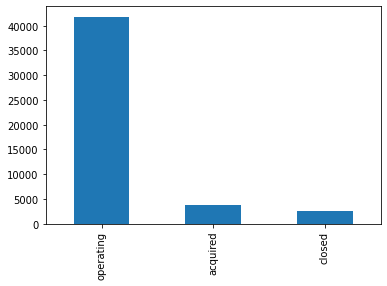

In [ ]:
#"status" Target feature's value_counting
#1= Acquired
#2=closed
#3=Operating
print(vc["status"].value_counts())
vc["status"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
#showing corelation of features to each other
vc.corr()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
funding_rounds,1.00,-0.06,0.09,0.40,-0.00,0.03,0.02,0.02,0.06,0.01,...,0.01,0.02,0.17,0.28,0.30,0.20,0.20,0.10,0.06,0.04
founded_year,-0.06,1.00,0.08,-0.09,0.01,-0.04,-0.01,-0.03,0.02,-0.09,...,-0.01,-0.00,-0.02,-0.04,-0.05,-0.03,-0.03,-0.01,-0.00,-0.00
seed,0.09,0.08,1.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,...,-0.00,0.20,0.01,0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00
venture,0.40,-0.09,-0.01,1.00,-0.01,0.01,0.00,0.01,0.01,0.01,...,0.06,-0.00,0.33,0.50,0.58,0.59,0.53,0.43,0.42,0.37
equity_crowdfunding,-0.00,0.01,-0.00,-0.01,1.00,-0.00,-0.00,-0.00,0.02,-0.00,...,-0.00,0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
undisclosed,0.03,-0.04,-0.00,0.01,-0.00,1.00,-0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.03,-0.00,-0.00,-0.00
convertible_note,0.02,-0.01,-0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
debt_financing,0.02,-0.03,-0.00,0.01,-0.00,-0.00,0.00,1.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,0.01,0.01,0.00,0.01,0.01,0.00,-0.00
angel,0.06,0.02,-0.00,0.01,0.02,0.00,-0.00,-0.00,1.00,-0.00,...,0.00,-0.00,0.02,0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00
grant,0.01,-0.09,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,...,-0.00,0.00,0.00,0.00,0.01,0.00,0.01,-0.00,-0.00,-0.00


<AxesSubplot:xlabel='funding_rounds'>

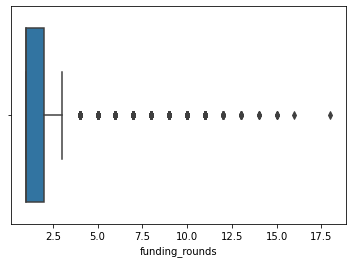

In [ ]:
sns.boxplot(vc.funding_rounds)

<AxesSubplot:xlabel='seed'>

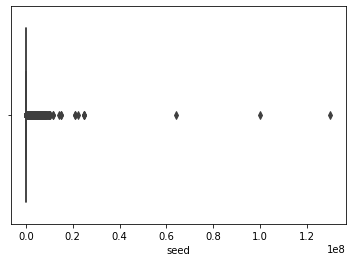

In [ ]:
sns.boxplot(vc.seed)

<AxesSubplot:xlabel='secondary_market'>

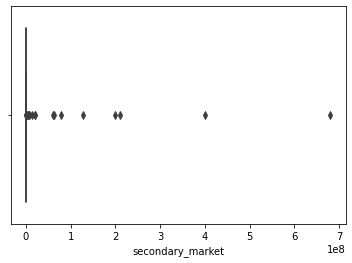

In [ ]:
sns.boxplot(vc.secondary_market)

<AxesSubplot:xlabel='venture'>

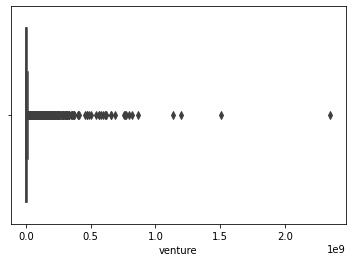

In [ ]:
sns.boxplot(vc.venture)

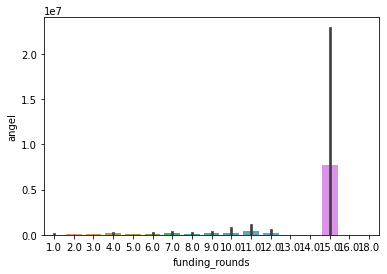

In [ ]:
sns.barplot(vc.funding_rounds,vc.angel)
plt.show()

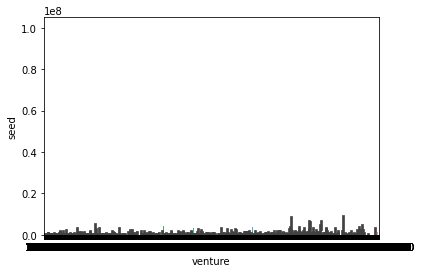

In [ ]:
sns.barplot(vc.venture,vc.seed)
plt.show()

#country_code analysis

In [ ]:
len(vc["country_code"].unique())

116

In [ ]:
vc.groupby("country_code").mean().T

country_code,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BGD,BGR,...,TWN,TZA,UGA,UKR,URY,USA,UZB,VNM,ZAF,ZWE
funding_rounds,1.00,1.23,1.60,2.50,1.48,1.54,1.33,1.48,2.29,1.74,...,1.37,1.14,1.20,1.13,1.33,1.89,1.00,1.19,1.27,1.00
founded_year,"2,014.00","2,009.89","2,009.90","2,008.50","2,008.35","2,008.86","2,012.00","2,006.78","2,009.71","2,011.20",...,"2,006.11","2,009.50","2,011.22","2,011.28","2,007.20","2,006.79","2,006.00","2,004.47","2,007.18",NaN
seed,0.00,"294,984.85","110,251.87","147,738.00","271,464.17","194,001.15","103,333.33","214,402.65","276,119.00","96,956.85",...,"167,733.05","230,571.43","1,700.00","104,355.56","28,333.33","237,217.86","90,000.00","26,190.48","33,600.02",0.00
venture,0.00,"4,156,742.42","1,566,841.92","13,258,750.00","2,346,202.82","2,935,360.14",0.00,"4,776,232.79","6,286,380.86","613,714.71",...,"14,239,743.54","1,000,000.00","250,000.00","462,000.00","958,333.33","9,378,347.79",0.00,"1,158,119.48","3,522,826.92",0.00
equity_crowdfunding,0.00,757.58,0.00,0.00,"5,254.78",0.00,0.00,0.00,0.00,"2,205.88",...,0.00,0.00,0.00,0.00,"13,333.33","6,556.26",0.00,0.00,0.00,0.00
undisclosed,0.00,227.27,"39,680.49",0.00,"16,719.75",0.00,0.00,"5,127.87",0.00,"1,020.88",...,"100,142.41",0.00,0.00,0.00,0.00,"50,007.88",0.00,0.00,"1,250,000.00",0.00
convertible_note,0.00,"7,575.76","4,362.42",0.00,"1,117.10",0.00,0.00,0.00,0.00,"5,773.66",...,0.00,0.00,0.00,0.00,0.00,"37,019.31",0.00,0.00,0.00,0.00
debt_financing,0.00,0.00,"24,862.97",0.00,"180,040.64","8,806.41",0.00,"97,065.23","284,897.00",0.00,...,0.00,0.00,"100,500.00",0.00,0.00,"2,717,185.00",0.00,0.00,"1,088,461.54","10,000,000.00"
angel,0.00,"57,367.42","39,474.60",0.00,"181,565.69","120,948.59",0.00,"76,570.18","20,313.71","6,102.94",...,"112,167.61","428,571.43","44,000.00","16,222.22","25,000.00","55,476.45",0.00,"2,380.95","57,361.54",0.00
grant,0.00,"148,030.30","1,879.19",0.00,"418,019.91","46,676.50","20,666.67","124,548.52","3,571.43",0.00,...,0.00,0.00,0.00,666.67,0.00,"202,074.91",0.00,0.00,"71,153.85",0.00


<AxesSubplot:ylabel='country_code'>

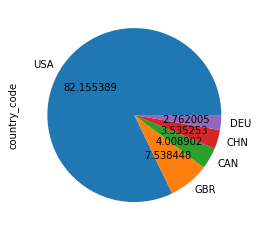

In [ ]:
vc["country_code"].value_counts()[:5].plot(kind="pie",autopct="%2f")

#Region Analysis

In [ ]:
vc.region

0        New York City
1          Los Angeles
2              Tallinn
3               London
4               Dallas
             ...      
54289              NaN
54290              NaN
54291              NaN
54292              NaN
54293              NaN
Name: region, Length: 54294, dtype: object

In [ ]:
len(vc["region"].unique())

1090

In [ ]:
vc.groupby("region").mean().T

region,A Coruna,AB - Other,AK - Other,AL - Other,AR - Other,ARG - Other,AUS - Other,AUT - Other,AZ - Other,AZE - Other,...,Zagreb,Zamudio,Zanzibar Urban,Zaragoza,Zhejiang,Zhengzhou,Zhuhai,Zurich,Çan,Évry
funding_rounds,1.00,1.00,1.25,1.06,1.15,1.57,1.17,1.24,1.25,2.00,...,1.33,1.00,1.00,2.00,1.00,1.00,1.25,1.46,1.55,1.00
founded_year,"2,012.50","2,011.17","2,010.25","2,000.42","2,008.32","2,009.00","2,008.10","2,006.46","2,007.50","2,013.00",...,"2,008.00",NaN,"2,004.00","2,004.50",NaN,"2,012.00","1,995.00","2,008.63","2,006.60","2,006.50"
seed,"17,500.00","14,285.71","37,500.00","58,250.00","31,784.40","129,237.57","472,909.07","172,744.12","37,500.00","100,000.00",...,"60,774.67",0.00,0.00,"35,569.50",0.00,0.00,0.00,"242,873.62","119,086.79",0.00
venture,"1,151,725.00","3,142,857.14","2,175,000.00","189,687.50","64,087.80","175,714.29","858,126.60","2,498,456.76","6,525,000.00",0.00,...,"877,889.67","119,000.00",0.00,"250,000.00","24,515,000.00","5,737,911.00","76,045,705.00","4,181,770.61","7,361,915.48","129,000.00"
equity_crowdfunding,0.00,"139,285.71",0.00,0.00,0.00,0.00,0.00,0.00,"1,250.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
undisclosed,"67,705.00",0.00,0.00,0.00,0.00,0.00,"6,666.67",0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"8,160.00",0.00,0.00,0.00
convertible_note,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
debt_financing,0.00,0.00,0.00,"666,875.00",0.00,0.00,0.00,0.00,"12,500.00",0.00,...,0.00,0.00,0.00,"161,859.75",0.00,0.00,0.00,0.00,"2,500,000.00",0.00
angel,0.00,0.00,0.00,0.00,"50,000.00",0.00,"6,666.67","23,529.41",0.00,0.00,...,0.00,0.00,"3,000,000.00",0.00,0.00,0.00,0.00,"147,101.50","2,272.73","92,251.33"
grant,0.00,0.00,0.00,0.00,0.00,0.00,"3,333.33",0.00,0.00,"62,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"36,527.03",0.00,0.00


<AxesSubplot:ylabel='region'>

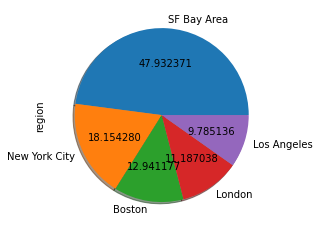

In [ ]:
vc["region"].value_counts()[:5].plot(kind="pie",autopct="%2f",shadow=True)

#City Analysis

In [ ]:
len(vc["city"].unique())

4189

In [ ]:
vc.city=="New York"

0         True
1        False
2        False
3        False
4        False
         ...  
54289    False
54290    False
54291    False
54292    False
54293    False
Name: city, Length: 54294, dtype: bool

<AxesSubplot:ylabel='city'>

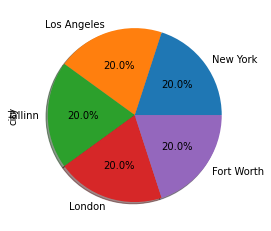

In [ ]:
vc.city[:5].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True)

#funding _rounds analysis

In [ ]:
len(vc["funding_rounds"].unique())

18

In [ ]:
vc.funding_rounds.value_counts()

1.00     32039
2.00      9219
3.00      4026
4.00      1997
5.00      1001
6.00       560
7.00       252
8.00       152
9.00        84
10.00       43
11.00       35
12.00       12
13.00        8
15.00        4
14.00        4
16.00        1
18.00        1
Name: funding_rounds, dtype: int64

In [ ]:
vc.groupby("funding_rounds").mean().T

funding_rounds,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,18.00
founded_year,"2,007.49","2,007.63","2,007.33","2,006.51","2,006.14","2,005.63","2,005.03","2,004.48","2,004.12","2,004.30","2,003.21","2,004.83","2,004.29","2,005.33","2,002.75","2,008.00","2,005.00"
seed,"142,862.76","298,514.93","419,169.95","401,149.50","398,666.48","495,548.80","364,693.37","673,373.82","328,671.01","420,070.44","177,639.09","22,941.67",0.00,0.00,"335,000.00","1,745,363.00",0.00
venture,"2,469,194.28","7,381,630.24","15,043,478.90","24,747,220.45","37,502,547.19","53,592,657.50","59,542,052.87","77,571,497.82","81,216,364.08","86,557,892.91","178,354,618.17","133,749,891.92","50,163,502.38","35,073,387.50","59,888,589.25",0.00,"169,793,165.00"
equity_crowdfunding,"6,721.19","2,991.36","12,290.48","1,523.52","1,955.98","10,719.34",198.41,0.00,"14,880.95",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
undisclosed,"84,581.29","157,388.18","156,623.64","348,661.47","265,578.82","309,380.57","913,390.95","612,322.55","488,948.44","1,574,561.14","14,285.71","5,295,965.08",0.00,0.00,"3,750,000.00",0.00,0.00
convertible_note,"14,378.48","17,360.35","42,803.86","58,842.81","65,133.70","96,770.88","155,522.62","145,569.83","571,293.48","46,884.02","128,571.43","406,771.08","59,375.00","987,500.00",0.00,0.00,0.00
debt_financing,"898,110.09","1,022,328.64","1,876,901.59","2,020,135.30","32,643,950.18","5,407,802.16","4,846,856.27","11,758,927.35","23,979,968.83","29,904,702.95","30,470,001.23","5,887,435.58","41,366,933.00","6,050,994.00","1,162,755.25","2,832,362.00","43,017,719.00"
angel,"42,559.44","80,340.28","121,987.45","154,887.81","111,029.77","129,556.82","221,097.38","115,783.90","160,507.46","238,000.00","439,000.00","195,833.33",0.00,0.00,"7,763,597.50","37,749.00",0.00
grant,"112,290.53","320,974.92","85,343.15","178,516.33","84,695.29","179,065.91","136,398.37","2,101,684.21","928,184.50","852,325.58","3,617,142.86","136,991.67","1,491,958.38",0.00,0.00,"229,846.00",0.00
private_equity,"1,590,980.73","1,641,510.68","2,215,369.19","3,957,418.94","5,247,051.24","5,597,607.72","5,297,388.20","18,008,935.55","32,967,610.00","10,948,484.00","67,424,010.94","70,064,603.50","90,005,000.00",0.00,0.00,0.00,0.00


<AxesSubplot:ylabel='funding_rounds'>

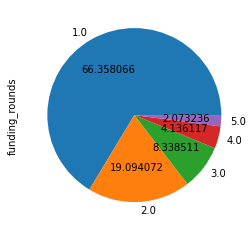

In [ ]:
vc["funding_rounds"].value_counts()[:5].plot(kind="pie",autopct="%2f")

#state_code analysis

In [ ]:
vc.state_code

0         NY
1         CA
2        NaN
3        NaN
4         TX
        ... 
54289    NaN
54290    NaN
54291    NaN
54292    NaN
54293    NaN
Name: state_code, Length: 54294, dtype: object

In [ ]:
len(vc["state_code"].unique())

62

In [ ]:
vc.groupby("state_code").mean().T

state_code,AB,AK,AL,AR,AZ,BC,CA,CO,CT,DC,...,SK,TN,TX,UT,VA,VT,WA,WI,WV,WY
funding_rounds,1.30,1.58,1.35,1.17,1.57,1.78,2.03,1.94,1.74,1.72,...,1.25,1.95,1.80,1.74,1.77,1.58,1.98,1.76,1.53,1.06
founded_year,"2,007.88","2,006.91","2,001.36","2,007.22","2,006.61","2,007.33","2,007.37","2,006.65","2,005.60","2,008.78",...,"2,012.33","2,007.09","2,006.21","2,005.79","2,005.75","2,004.94","2,007.18","2,004.72","2,007.00","2,009.12"
seed,"139,355.08","282,629.50","206,324.73","38,889.95","120,846.70","207,886.35","315,763.09","170,584.51","102,873.74","248,075.07",...,0.00,"483,223.34","190,516.67","223,964.08","164,892.09","26,364.58","195,713.36","161,170.14","106,215.00","68,036.47"
venture,"2,336,176.13","931,196.92","2,690,657.99","833,706.71","4,939,622.46","5,133,745.41","13,593,017.82","7,492,327.67","7,112,319.78","8,624,003.74",...,"1,955,513.50","2,882,452.49","7,501,193.75","8,530,574.83","6,290,039.93","3,753,868.40","8,407,612.54","4,769,023.65","628,806.67","737,139.06"
equity_crowdfunding,"8,695.65",83.33,"1,238.10","5,927.68","68,352.91","1,514.15","3,243.19","46,747.37",572.78,"5,686.81",...,0.00,"2,405.11","13,017.67",665.75,"3,148.28","10,416.67",431.21,"43,048.36",0.00,"9,705.88"
undisclosed,"335,437.51",0.00,0.00,0.00,"2,370.03","103,637.13","35,902.67","56,565.03","25,158.23","1,043.96",...,0.00,"20,681.51","13,873.41",0.00,"182,258.59",0.00,"2,934.58",0.00,0.00,0.00
convertible_note,"6,666.66",0.00,0.00,225.99,"10,030.58","34,051.81","65,018.13","59,737.43","3,929.03","91,064.60",...,0.00,"11,782.14","14,150.95","5,643.84","13,240.87","79,166.67","12,355.83","5,172.77",400.00,0.00
debt_financing,"1,252,805.75","11,250.00","1,081,477.71","138,418.08","599,983.62","356,493.32","1,285,355.71","412,817.71","1,015,441.89","328,926.98",...,0.00,"410,034.01","3,378,609.10","2,684,905.96","1,032,645.73","96,770.83","740,815.40","401,305.55","226,966.67",0.00
angel,"183,178.05",0.00,0.00,"8,474.58","45,164.07","85,581.91","63,517.79","48,331.26","19,177.22","58,214.29",...,0.00,"24,805.35","44,553.21","118,001.37","55,468.35",0.00,"106,201.48","47,442.41",0.00,0.00
grant,"1,958.22",0.00,"61,904.75","117,429.38","29,553.52","52,701.35","67,299.00","655,712.22","184,433.54","1,269,496.26",...,0.00,"108,718.27","104,545.02","3,772.60","223,112.98","41,666.67","77,339.84","48,115.18",0.00,0.00


In [ ]:
vc["state_code"].value_counts()

CA    9917
NY    2914
MA    1969
TX    1466
WA     974
      ... 
MB      13
AK      12
NB       8
SK       4
PE       2
Name: state_code, Length: 61, dtype: int64

<AxesSubplot:ylabel='state_code'>

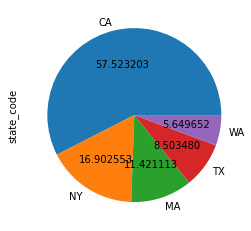

In [ ]:
vc["state_code"].value_counts()[:5].plot(kind="pie",autopct="%2f")

#seed

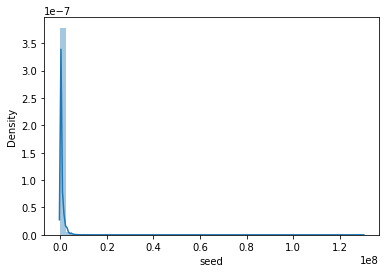

In [ ]:
sns.distplot(vc["seed"])
plt.show()

## market analysis

#some columns name are in string with space,so rename them

In [ ]:
vc.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

In [ ]:
vc.groupby("market").mean().T

market,3D,3D Printing,3D Technology,Accounting,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,...,Wireless,Women,World Domination,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth
funding_rounds,1.52,1.78,1.75,2.06,1.77,1.00,1.33,1.89,3.50,1.00,...,2.30,1.67,2.50,3.00,1.50,1.79,1.48,1.54,1.67,1.75
founded_year,"2,010.71","2,012.25","2,011.71","2,008.00","2,010.08","1,967.00","2,011.83","2,007.78","2,009.50","2,009.25",...,"2,004.76","2,008.64","2,008.50","2,013.00","2,011.50","2,011.20","2,009.78","2,009.62","2,010.00","2,012.43"
seed,"598,831.48","296,444.44","1,295,625.00","225,083.39","704,006.38",0.00,"41,666.67","261,813.08",0.00,"175,000.00",...,"51,796.05","28,091.25","305,133.50","345,000.00","550,000.00","376,784.19","240,470.86","312,497.35","912,666.67","146,680.12"
venture,"3,288,171.00","2,977,777.78","1,101,919.00","7,850,238.50","5,657,841.77",0.00,"119,405.33","9,896,281.66","38,568,600.00","1,875,000.00",...,"20,304,046.00","6,091,666.67","13,949,994.83",0.00,0.00,"4,133,056.27","1,427,898.59","2,530,765.93","533,333.33","12,500.00"
equity_crowdfunding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,047.46",0.00,0.00,...,657.89,0.00,0.00,0.00,0.00,"27,083.33",0.00,0.00,0.00,0.00
undisclosed,0.00,0.00,"25,000.00",0.00,0.00,0.00,0.00,"97,878.77",0.00,0.00,...,"557,894.74",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
convertible_note,0.00,0.00,"25,625.00","165,700.56",0.00,0.00,0.00,"2,234.96",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,"20,833.33",0.00,0.00,0.00,625.00
debt_financing,0.00,0.00,"23,125.00",0.00,"230,769.23",0.00,0.00,"370,732.77",0.00,0.00,...,"1,374,884.53","4,166.67","433,333.33",0.00,0.00,"27,604.17","12,068.97","121,896.84",0.00,0.00
angel,"46,000.00",0.00,"68,750.00","284,391.56","355,810.15",0.00,"85,833.33","63,522.44","141,410.00",0.00,...,"67,662.50","166,666.67","115,575.00",0.00,0.00,"21,041.67","91,379.31","79,610.16",0.00,"412,500.00"
grant,0.00,0.00,0.00,0.00,0.00,0.00,0.00,761.26,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"5,172.41",507.25,0.00,"40,493.12"


In [ ]:
len(vc["market"].unique())

754

In [ ]:
vc["market"].value_counts()[:5]

 Software          4620
 Biotechnology     3688
 Mobile            1983
 E-Commerce        1805
 Curated Web       1655
Name: market, dtype: int64

In [ ]:
vc[vc["market"]=="Clean Technology"][0:10]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


(array([3., 2., 4., 2., 4.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

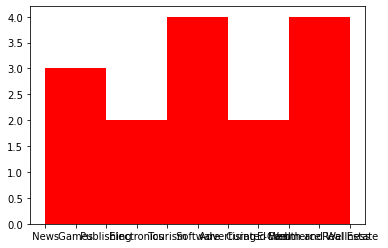

In [ ]:
plt.hist(vc["market"][:15],bins=5,color="red")

In [ ]:
#what is situation education field in 2000 to 2012 in market sector.
vc[vc["market"]=="Education"][200:212]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


#Status and other feature's relation

<AxesSubplot:xlabel='status', ylabel='city'>

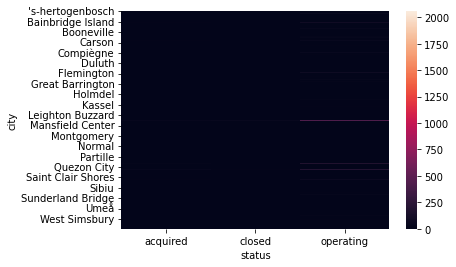

In [ ]:
sns.heatmap(pd.crosstab(vc["city"],vc["status"]))

<AxesSubplot:xlabel='region', ylabel='status'>

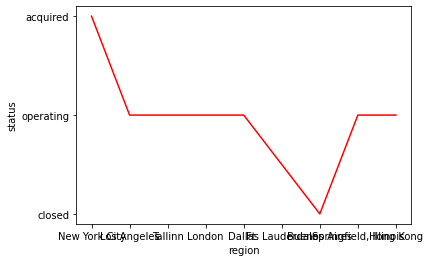

In [ ]:
sns.lineplot(vc["region"][:10],vc["status"],color="red")

<AxesSubplot:xlabel='founded_year', ylabel='status'>

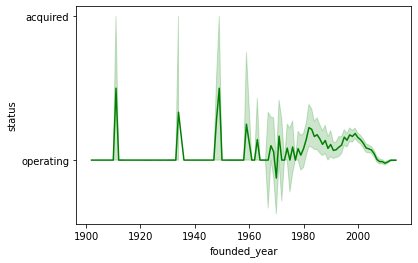

In [ ]:
sns.lineplot(vc["founded_year"],vc["status"],color="green")

<AxesSubplot:xlabel='founded_year', ylabel='status'>

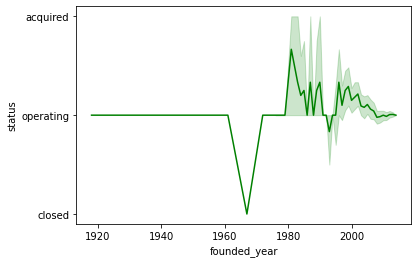

In [ ]:
sns.lineplot(vc["founded_year"][:2014],vc["status"],color="green")

<AxesSubplot:xlabel='city', ylabel='status'>

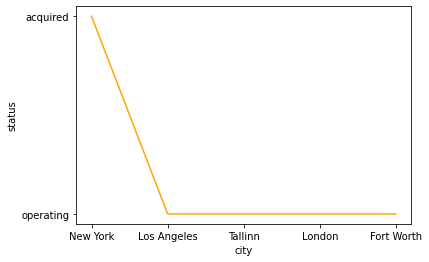

In [ ]:
sns.lineplot(vc["city"][:5],vc["status"],color="orange")

<AxesSubplot:xlabel='market', ylabel='status'>

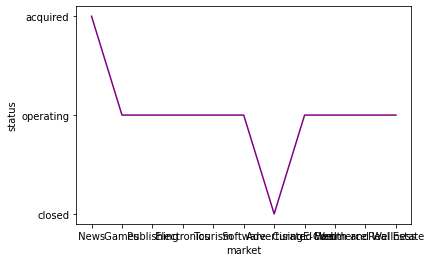

In [ ]:
sns.lineplot(vc["market"][:15],vc["status"],color="purple")

<AxesSubplot:xlabel='funding_total_usd', ylabel='market'>

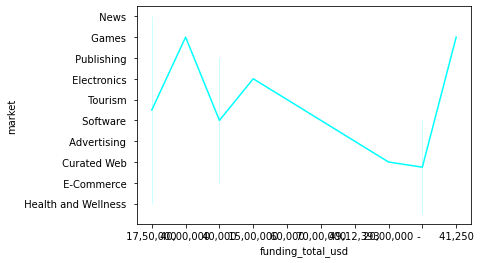

In [ ]:
sns.lineplot(vc["funding_total_usd"],vc["market"][:15],color="Cyan")

#Category_list Analysis

In [ ]:
vc.groupby("category_list").mean().T

category_list,|3D Printing|,|3D Printing|3D|,|3D Printing|Consumer Electronics|,|3D Printing|Hardware + Software|,|3D Printing|Local|Marketplaces|Collaborative Consumption|,|3D Technology|,|3D Technology|3D Printing|3D|,|3D Technology|3D Printing|Marketplaces|Printing|Design|CAD|Curated Web|,|3D Technology|Entertainment|Game|3D|,|3D Technology|Graphics|,...,|iPod Touch|iPad|iPhone|Android|App Marketing|App Discovery|Mobile|,|iPod Touch|iPad|iPhone|Wireless|Hardware + Software|,|iPod Touch|iPhone|iPad|Entertainment|Peer-to-Peer|Consumer Electronics|Online Shopping|Video Games|Hardware|Marketplaces|Media|Retail|E-Commerce|,|mHealth|,|mHealth|Enterprise Software|,|mHealth|Health Care Information Technology|,|mHealth|Health Care|,|mHealth|Location Based Services|SaaS|Enterprise Software|,|mHealth|Mobile|,|mHealth|Mobile|Health and Wellness|Health Care|
funding_rounds,1.00,1.00,1.00,3.00,2.00,1.00,1.00,5.00,1.00,1.00,...,2.00,1.00,3.00,1.50,2.00,1.00,2.00,2.00,5.00,1.00
founded_year,"2,011.67",NaN,"2,013.00","2,011.00","2,013.00","2,013.00","2,013.00","2,013.00",NaN,"2,011.00",...,"2,011.00","2,005.00","2,006.00","2,013.50","2,010.00","2,013.00","2,014.00",NaN,"2,012.00",NaN
seed,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,"2,628,000.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,"276,672.00","20,000.00","200,000.00","195,383.00",0.00
venture,"550,000.00",0.00,0.00,"19,500,000.00","4,500,000.00",0.00,"3,350,000.00",0.00,0.00,0.00,...,"1,600,000.00",0.00,"27,000,000.00",0.00,"115,000.00",0.00,0.00,"200,000.00","100,000.00",0.00
equity_crowdfunding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
undisclosed,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
convertible_note,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"5,000.00",0.00,0.00,0.00
debt_financing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,"75,000.00",0.00,0.00,0.00,0.00,0.00
angel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"250,000.00","500,000.00",0.00,"1,650,000.00",0.00,0.00,0.00,0.00,0.00,0.00
grant,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"323,945.00",0.00


In [ ]:
vc.category_list

0               |Entertainment|Politics|Social Media|News|
1                                                  |Games|
2                                   |Publishing|Education|
3        |Electronics|Guides|Coffee|Restaurants|Music|i...
4                            |Tourism|Entertainment|Games|
                               ...                        
54289                                                  NaN
54290                                                  NaN
54291                                                  NaN
54292                                                  NaN
54293                                                  NaN
Name: category_list, Length: 54294, dtype: object

In [ ]:
vc["category_list"].value_counts()

|Software|                                                                                     3650
|Biotechnology|                                                                                3597
|E-Commerce|                                                                                   1263
|Mobile|                                                                                       1211
|Curated Web|                                                                                  1120
                                                                                               ... 
|Fashion|Digital Media|Marketplaces|E-Commerce|                                                   1
|Advertising|Web Development|App Marketing|Enterprises|Cloud Computing|Enterprise Software|       1
|Web Design|Software|Web Tools|Web Development|Enterprise Software|                               1
|3D|Web Tools|Entertainment|Curated Web|                                                          1


#Most of the startups are from software and  biotechnology  industries

###DATA PREPROCESSING  OR  DATA WRANGLING

In [ ]:
vc.isnull().mean()*100

permalink               8.94
name                    8.95
homepage_url           15.30
category_list          16.24
market                 16.25
funding_total_usd       8.94
status                 11.36
country_code           18.66
state_code             44.45
region                 18.66
city                   20.21
funding_rounds          8.94
founded_at             28.99
founded_month          29.12
founded_quarter        29.12
founded_year           29.12
first_funding_at        8.94
last_funding_at         8.94
seed                    8.94
venture                 8.94
equity_crowdfunding     8.94
undisclosed             8.94
convertible_note        8.94
debt_financing          8.94
angel                   8.94
grant                   8.94
private_equity          8.94
post_ipo_equity         8.94
post_ipo_debt           8.94
secondary_market        8.94
product_crowdfunding    8.94
round_A                 8.94
round_B                 8.94
round_C                 8.94
round_D       

# Let's do categorical feature's into categories form

In [ ]:
vc['permalink']=vc['permalink'].astype("category")
vc['permalink']=vc['permalink'].cat.codes

In [ ]:
vc["name"].head()

0              #waywire
1    &TV Communications
2     'Rock' Your Paper
3     (In)Touch Network
4    -R- Ranch and Mine
Name: name, dtype: object

In [ ]:
vc['name']=vc['name'].astype("category")
vc['name']=vc['name'].cat.codes

In [ ]:
vc['homepage_url']=vc['homepage_url'].astype("category")
vc['homepage_url']=vc['homepage_url'].cat.codes

In [ ]:
vc['category_list']=vc['category_list'].astype("category")
vc['category_list']=vc['category_list'].cat.codes

In [ ]:
vc['funding_total_usd']=vc['funding_total_usd'].astype("category")
vc['funding_total_usd']=vc['funding_total_usd'].cat.codes

In [ ]:
vc['country_code']=vc['country_code'].astype("category")
vc['country_code']=vc['country_code'].cat.codes

In [ ]:
vc['state_code']=vc['state_code'].astype("category")
vc['state_code']=vc['state_code'].cat.codes

In [ ]:
vc['region']=vc['region'].astype("category")
vc['region']=vc['region'].cat.codes

In [ ]:
vc['city']=vc['city'].astype("category")
vc['city']=vc['city'].cat.codes

In [ ]:
vc['funding_rounds']=vc['funding_rounds'].astype("category")
vc['funding_rounds']=vc['funding_rounds'].cat.codes

In [ ]:
vc['founded_at']=vc['founded_at'].astype("category")
vc['founded_at']=vc['founded_at'].cat.codes

In [ ]:
vc['founded_month']=vc['founded_month'].astype("category")
vc['founded_month']=vc['founded_month'].cat.codes

In [ ]:
vc['founded_year']=vc['founded_year'].astype("category")
vc['founded_year']=vc['founded_year'].cat.codes

In [ ]:
vc['first_funding_at']=vc['first_funding_at'].astype("category")
vc['first_funding_at']=vc['first_funding_at'].cat.codes

In [ ]:
vc['last_funding_at']=vc['last_funding_at'].astype("category")
vc['last_funding_at']=vc['last_funding_at'].cat.codes

In [ ]:
vc['founded_quarter']=vc['founded_quarter'].astype("category")
vc['founded_quarter']=vc['founded_quarter'].cat.codes

In [ ]:
vc['market']=vc['market'].astype("category")
vc['market']=vc['market'].cat.codes

In [ ]:
vc.dtypes

permalink                 int32
name                      int32
homepage_url              int32
category_list             int16
market                    int16
funding_total_usd         int16
status                   object
country_code               int8
state_code                 int8
region                    int16
city                      int16
funding_rounds             int8
founded_at                int16
founded_month             int16
founded_quarter           int16
founded_year               int8
first_funding_at          int16
last_funding_at           int16
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [ ]:
vc.drop_duplicates(inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

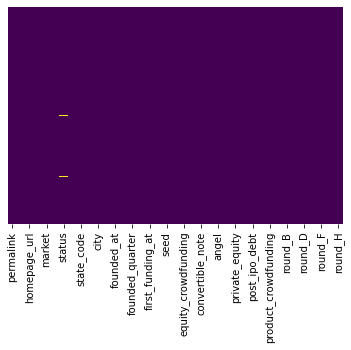

In [ ]:
#Lets check NAN  once again. Only "status" features(target feature) we do not changed.
sns.heatmap(vc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#After removing duplicates shape of our datset
vc.shape

(49439, 39)

In [ ]:
#In our dataset we replace nan values by 0
vc.fillna((0),inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#no NAN in our datset because we replace the values by 0,so it's shape
vc.shape

(49439, 39)

In [ ]:
# After NAN removing one rows is till now with NAN , so we remove it using dropna
vc.dropna(axis=0,inplace=True)
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,47058,0,43610,5171,465,3978,acquired,110,40,699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44587,1,4422,6122,277,9441,operating,110,6,570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36158,2,37197,11481,543,9446,operating,35,-1,956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20284,3,15435,4663,211,3482,operating,38,-1,568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34662,4,-1,15218,683,11816,operating,110,53,251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,49434,46502,45116,4894,233,3684,operating,20,-1,89,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,49435,47044,45117,16170,732,14548,operating,44,-1,905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,471,47046,16607,6122,277,14402,operating,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,48101,47047,44395,4894,233,9087,operating,110,40,699,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

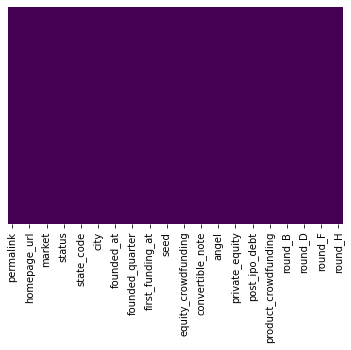

In [ ]:
# Let's see NAN  once again, No NAN  or nulls in  our dataset
sns.heatmap(vc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#By using function check the null values, so there no null values in our dataset
vc.isnull().sum()

permalink               0
name                    0
homepage_url            0
category_list           0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           0
founded_quarter         0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H     

#IN our dataset there is no NAN or null values. We have Cleaned_data now.

#Feature Engineering  and feature selection







<AxesSubplot:>

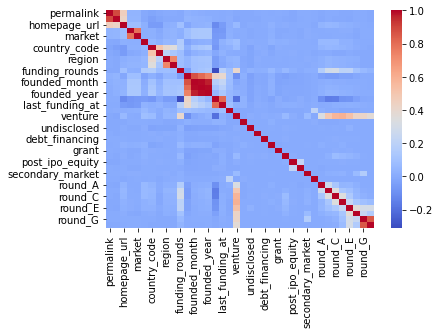

In [ ]:
# For feature selection it helps
sns.heatmap(vc.corr(),cmap="coolwarm")

# Target feature

In [ ]:
#class distribution
vc["status"].value_counts()

operating    41829
acquired      3692
closed        2603
0             1315
Name: status, dtype: int64

In [ ]:
# Our target variable
vc["status"].unique()

array(['acquired', 'operating', 0, 'closed'], dtype=object)

In [ ]:
#Lets check null values of our target variable
vc["status"].isnull().sum()

0

In [ ]:
vc.dtypes

permalink                 int32
name                      int32
homepage_url              int32
category_list             int16
market                    int16
funding_total_usd         int16
status                   object
country_code               int8
state_code                 int8
region                    int16
city                      int16
funding_rounds             int8
founded_at                int16
founded_month             int16
founded_quarter           int16
founded_year               int8
first_funding_at          int16
last_funding_at           int16
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [ ]:
#we will subset data from column 21 to 39(all float dtypes)
subset=vc.iloc[:,18:]

In [ ]:
subset

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,0.0,28000000.0,0.0,0.0,0.0,17000000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vc["round_H"].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49434    0
49435    0
49436    0
49437    0
49438    0
Name: round_H, Length: 49439, dtype: int64

In [ ]:
#values of target column
vc["status"].value_counts()

operating    41829
acquired      3692
closed        2603
0             1315
Name: status, dtype: int64

In [ ]:
vc["status"].value_counts().sum()

49439

#Standardization of the data using standard-scale
mean centering and a process of scaling the factor of #standard deviation by doing Standardization
#Standardization gives us data values in the format between 0 or 1 as a standard form.

In [ ]:
from sklearn. preprocessing import StandardScaler
Scaler=StandardScaler()
columns_to_scale=['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at','secondary_market',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
        'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
vc[columns_to_scale]=Scaler.fit_transform(vc[columns_to_scale])

In [ ]:
vc.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1.565412,-1.732320,1.587558,-0.375471,0.631000,-0.371979,acquired,0.768448,1.389624,0.502794,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
1,1.392267,-1.732250,-1.204190,-0.187306,-0.183743,0.814998,operating,0.768448,-0.426843,0.122663,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
2,0.801640,-1.732179,1.130696,0.873026,0.969032,0.816084,operating,-0.960248,-0.800822,1.260110,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
3,-0.310665,-1.732109,-0.419626,-0.475984,-0.469770,-0.479748,operating,-0.891101,-0.800822,0.116769,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
4,0.696814,-1.732039,-1.519284,1.612428,1.575756,1.331027,operating,0.768448,2.084156,-0.817352,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


In [ ]:
vc.shape

(49439, 39)

In [ ]:
vc['status']=vc['status'].astype("category")
vc['status']=vc['status'].cat.codes

In [ ]:
vc["status"]=vc["status"].replace({"operating":1,"acquired":2,"closed":3,"zero":0})

In [ ]:
vc

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1.565412,-1.732320,1.587558,-0.375471,0.631000,-0.371979,1,0.768448,1.389624,0.502794,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
1,1.392267,-1.732250,-1.204190,-0.187306,-0.183743,0.814998,3,0.768448,-0.426843,0.122663,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
2,0.801640,-1.732179,1.130696,0.873026,0.969032,0.816084,3,-0.960248,-0.800822,1.260110,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
3,-0.310665,-1.732109,-0.419626,-0.475984,-0.469770,-0.479748,3,-0.891101,-0.800822,0.116769,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
4,0.696814,-1.732039,-1.519284,1.612428,1.575756,1.331027,3,0.768448,2.084156,-0.817352,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,1.731901,1.531934,1.694845,-0.430278,-0.374428,-0.435858,3,-1.305988,-0.800822,-1.294726,...,-0.009951,-0.01652,0.062071,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49435,1.731971,1.569980,1.694916,1.800791,1.788110,1.924624,3,-0.752805,-0.800822,1.109826,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49436,-1.698978,1.570121,-0.336132,-0.187306,-0.183743,1.892902,3,-1.790023,-0.800822,-1.559934,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49437,1.638496,1.570191,1.643481,-0.430278,-0.374428,0.738082,3,0.768448,1.389624,0.502794,...,-0.009951,-0.01652,2.667468,1.138451,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


#Define X and y

In [ ]:
#X are our indepedent features and y is our target feature.
X=vc.drop(["status"],axis=1)
y=vc["status"]

In [ ]:
X

,permalink,name,homepage_url,category_list,market,funding_total_usd,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1.565412,-1.732320,1.587558,-0.375471,0.631000,-0.371979,0.768448,1.389624,0.502794,0.489989,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
1,1.392267,-1.732250,-1.204190,-0.187306,-0.183743,0.814998,0.768448,-0.426843,0.122663,0.149766,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
2,0.801640,-1.732179,1.130696,0.873026,0.969032,0.816084,-0.960248,-0.800822,1.260110,1.321982,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
3,-0.310665,-1.732109,-0.419626,-0.475984,-0.469770,-0.479748,-0.891101,-0.800822,0.116769,0.139916,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
4,0.696814,-1.732039,-1.519284,1.612428,1.575756,1.331027,0.768448,2.084156,-0.817352,-0.504917,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,1.731901,1.531934,1.694845,-0.430278,-0.374428,-0.435858,-1.305988,-0.800822,-1.294726,-1.239920,...,-0.009951,-0.01652,0.062071,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49435,1.731971,1.569980,1.694916,1.800791,1.788110,1.924624,-0.752805,-0.800822,1.109826,1.215141,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49436,-1.698978,1.570121,-0.336132,-0.187306,-0.183743,1.892902,-1.790023,-0.800822,-1.559934,-1.440719,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
49437,1.638496,1.570191,1.643481,-0.430278,-0.374428,0.738082,0.768448,1.389624,0.502794,0.489989,...,-0.009951,-0.01652,2.667468,1.138451,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


In [ ]:
y

0        1
1        3
2        3
3        3
4        3
        ..
49434    3
49435    3
49436    3
49437    3
49438    0
Name: status, Length: 49439, dtype: int8

<AxesSubplot:>

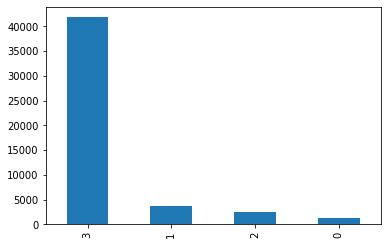

In [ ]:
vc["status"].value_counts().plot.bar()

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

##Train Test Split Ratio-80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_test.shape

(9888, 38)

In [ ]:
X_test.shape

(9888,)

In [ ]:
X_train.shape

(39551, 38)

In [ ]:
y_train.shape

(39551,)

In [ ]:
X_train

,permalink,name,homepage_url,category_list,market,funding_total_usd,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
41431,1.172946,1.032700,-0.601928,0.628075,0.652669,0.967525,0.768448,-0.426843,0.906499,1.021919,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
16109,-0.603000,-0.655513,0.267910,-0.685320,-0.708126,0.740472,0.768448,-0.426843,0.906499,1.021919,...,-0.009951,-0.01652,-0.224866,-0.199779,0.72492,3.083283,-0.063339,-0.027042,-0.01098,-0.005238
40443,1.104346,0.967137,-1.519284,0.274499,0.375309,-1.236301,0.768448,0.160837,1.100985,-0.626154,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
26927,0.154396,0.056134,-1.519284,-1.094890,-1.128499,-0.486266,-1.790023,-0.800822,-1.559934,-1.440719,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
43967,1.349314,1.209243,1.456405,0.927635,-0.976818,-0.387623,0.768448,2.297858,1.024370,-1.289172,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.261744,-0.957637,0.062098,-1.398803,-1.388524,0.814998,0.768448,1.389624,0.449752,0.751408,...,-0.009951,-0.01652,-0.224866,0.335513,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
44732,1.403198,1.255713,1.492737,0.071297,0.457651,1.640210,0.768448,-0.373418,1.428075,1.240904,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
38158,0.945075,0.819234,-1.488010,1.452162,1.428409,-1.106588,0.768448,1.389624,0.502794,0.489989,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
860,-1.672281,-1.653420,-0.383079,1.385483,-0.855473,-1.236301,0.768448,-0.159716,1.266004,-0.876207,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.15079,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


In [ ]:
y_train

41431    3
16109    3
40443    3
26927    3
43967    3
        ..
11284    1
44732    3
38158    3
860      3
15795    1
Name: status, Length: 39551, dtype: int8

#Logistic Regession

#This is multiclass classification problem so,we need here multilabelbinazer and One Vs Rest classifier.

In [ ]:
#importing importatnt libraries
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor
model = LogisticRegression()
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
L = OneVsRestClassifier(LogisticRegression())
L.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
L.intercept_

array([[-3.84241127],
       [-3.12618197],
       [-3.48792282],
       [ 1.97996215]])

In [ ]:
L.coef_

array([[-1.70513610e-03,  5.67899945e-02, -1.76669168e-01,
        -1.64646230e-01, -2.39477211e-01,  6.14130490e-02,
        -7.16144217e-02, -2.47877663e-01,  1.38689189e-01,
        -5.79554332e-02,  2.49329941e-02,  1.69169088e-01,
        -4.59219464e-01, -1.22741947e+00,  1.40366787e+00,
         4.54084576e-02,  1.38683780e-01, -1.82579230e-01,
        -7.36031147e-02, -4.98993313e-02, -6.01279627e-04,
        -3.28337605e-02, -8.56933082e-02, -3.27828442e-02,
        -7.90535183e-03, -2.04545462e-02,  1.02684200e-02,
         5.29122310e-03, -2.14367118e-01, -2.40455489e-01,
        -1.39159972e-01, -6.58356877e-02, -2.16407028e-01,
        -3.09000542e-01, -7.49823119e-02, -6.67039802e-01,
        -2.99778914e-01, -6.42219839e-02],
       [ 1.87515111e-02, -8.52533967e-02,  1.41809986e-01,
         7.97119727e-02,  3.30761919e-02,  3.76184602e-02,
         3.37639716e-01,  5.94114797e-03,  7.50176503e-02,
         1.28317435e-02,  1.81105531e-01, -3.70701757e-01,
         2.68

In [ ]:
X_test

,permalink,name,homepage_url,category_list,market,funding_total_usd,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
32168,0.522758,0.402832,-0.798408,-0.871506,-0.521775,0.780233,0.768448,-0.426843,0.906499,1.021919,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
199,-1.718318,-1.718421,-0.450116,-0.687694,-0.712460,1.191971,0.768448,0.481391,1.501744,0.921140,...,-0.009951,-0.01652,-0.224866,0.362278,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
16026,-0.609026,-0.661480,0.265132,-1.373081,-1.353854,1.176761,-1.790023,-0.800822,-1.559934,-1.440719,...,-0.009951,-0.01652,-0.026018,0.402424,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
10791,-0.975637,-0.998280,0.039943,-1.094890,-1.128499,-0.280723,0.768448,-0.426843,0.122663,1.596282,...,-0.009951,-0.01652,-0.102846,1.396962,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
33656,0.628145,0.504475,1.023124,1.322563,1.311398,0.816084,-0.683657,-0.800822,-0.051196,-0.022997,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,0.412747,0.293536,0.894750,-1.380204,-1.349520,1.502675,0.768448,-0.426843,0.122663,0.679423,...,-0.009951,-0.01652,0.678988,1.874478,1.100237,1.962552,4.562535,-0.027042,-0.01098,-0.005238
33730,0.633610,0.509038,1.026116,1.374798,1.372070,-1.236301,0.768448,0.374539,-1.200430,0.456649,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
4546,-1.414911,-1.443323,-1.401667,0.352060,0.353641,-0.309838,0.768448,0.107412,-0.947009,-0.905759,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238
26559,0.128540,0.034232,1.740438,-1.094890,-1.128499,-1.236301,0.768448,0.374539,-1.200430,-1.048213,...,-0.009951,-0.01652,-0.224866,-0.199779,-0.150790,-0.075141,-0.063339,-0.027042,-0.01098,-0.005238


In [ ]:
L.score(X_train,y_train)

0.843897752269222

In [ ]:
L.score(X_test,y_test)

0.8462783171521036

In [ ]:
pred_L = L.predict(X_test)

In [ ]:
print(pred_L)

[3 3 3 ... 3 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [ ]:
print(classification_report(y_test,pred_L))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.47      0.06      0.10       729
           2       0.14      0.00      0.00       523
           3       0.85      0.99      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.37      0.26      0.26      9888
weighted avg       0.76      0.85      0.78      9888



In [ ]:
accuracy_score(y_test,pred_L)

0.8462783171521036

In [ ]:
mean_squared_error(y_test,pred_L)

0.587378640776699

In [ ]:
pred_L

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
r2_score(y_test,pred_L)

-0.15299009775123618

In [ ]:
#See the output inconfusion matrix
cm_L=confusion_matrix(y_test,pred_L)
cm_L

array([[   0,    1,    0,  263],
       [   0,   41,    0,  688],
       [   0,    5,    1,  517],
       [   0,   40,    6, 8326]])

Text(114.0, 0.5, 'Truth or Actual Values')

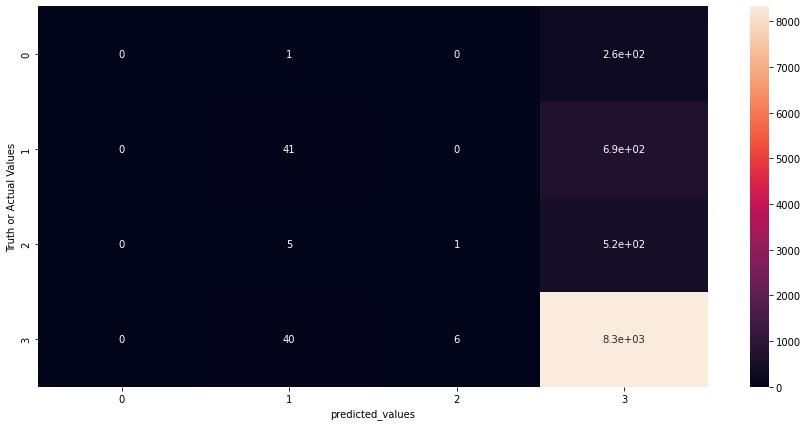

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_L,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("Logistic Regression confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_L))

Logistic Regression confusion matrix


,0,1,2,3
0,0,1,0,263
1,0,41,0,688
2,0,5,1,517
3,0,40,6,8326


#K-fold Cross Validation on LogsticRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
val_score=cross_val_score(L,X_train,y_train.ravel(),cv=5)

In [ ]:
val_score

array([0.84350904, 0.84576485, 0.84197219, 0.84412137, 0.84399494])

In [ ]:
val_score.mean()

0.8438724776475841

In [ ]:
val_score.std()

0.0012166532748849436

#BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag=BaggingClassifier(
    max_samples=.5,
    max_features=2,
    oob_score=True
    )

In [ ]:
#The OOB_score is computed as the number of correctly predicted rows from the out-of-bag sample.
bag.fit(X_train,y_train)

BaggingClassifier(max_features=2, max_samples=0.5, oob_score=True)

In [ ]:
bag.oob_score_

0.8426082779196481

In [ ]:
bag.score(X_train,y_train)

0.8495107582614851

In [ ]:
bag.score(X_test,y_test)

0.8467839805825242

In [ ]:
pred_bag = bag.predict(X_test)

In [ ]:
print(pred_bag)

[3 3 3 ... 3 3 3]


In [ ]:
print(classification_report(y_test,pred_bag))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       1.00      0.00      0.00       729
           2       0.00      0.00      0.00       523
           3       0.85      1.00      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.46      0.25      0.23      9888
weighted avg       0.79      0.85      0.78      9888



In [ ]:
accuracy_score(y_test,pred_bag)

0.8467839805825242

In [ ]:
mean_squared_error(y_test,pred_bag)

0.5876820388349514

In [ ]:
pred_bag

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
r2_score(y_test,pred_bag)

-0.1535856504876778

In [ ]:
#See the output inconfusion matrix
cm_bag=confusion_matrix(y_test,pred_bag)
cm_bag

array([[   0,    0,    0,  264],
       [   0,    1,    0,  728],
       [   0,    0,    0,  523],
       [   0,    0,    0, 8372]])

Text(114.0, 0.5, 'Truth or Actual Values')

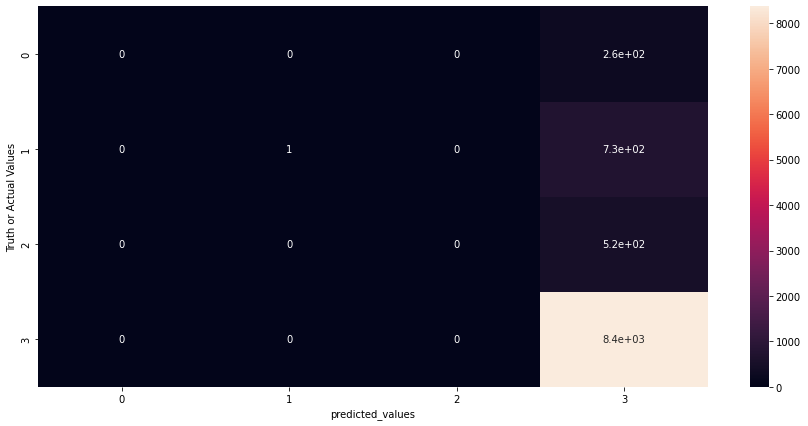

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_bag,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("Bagging confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_bag))

#K-foldcross_validationBagging

In [ ]:
val_score=cross_val_score(bag,X_train,y_train.ravel(),cv=5)

In [ ]:
val_score

array([0.84565794, 0.8460177 , 0.84589128, 0.84589128, 0.84589128])

In [ ]:
val_score.mean()

0.8458698948686566

In [ ]:
val_score.std()

0.00011673951042075142

#GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
m = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=20, learning_rate=1.0,max_depth=1, random_state=42))

m.fit(X_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         n_estimators=20,
                                                         random_state=42))

In [ ]:
m.classes_, m.multilabel_

(array([0, 1, 2, 3], dtype=int8), False)

In [ ]:
m.score(X_train, y_train)

0.8431645217567192

In [ ]:
m.score(X_test,y_test)

0.8454692556634305

In [ ]:
pred_GBL=m.predict(X_test)

In [ ]:
pred_GBL

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

#Classification Report

In [ ]:
print(classification_report(y_test,pred_GBL))

              precision    recall  f1-score   support

           0       0.19      0.04      0.07       264
           1       0.53      0.06      0.12       729
           2       0.00      0.00      0.00       523
           3       0.85      0.99      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.39      0.27      0.28      9888
weighted avg       0.77      0.85      0.79      9888



In [ ]:
accuracy_score(y_test,pred_GBL)

0.8454692556634305

In [ ]:
mean_squared_error(y_test,pred_GBL)

0.6090210355987055

In [ ]:
r2_score(y_test,pred_GBL)

-0.19547285961741445

In [ ]:
#See the output inconfusion matrix
cm_GBL=confusion_matrix(y_test,pred_GBL)
cm_GBL

array([[  11,    0,    0,  253],
       [   2,   47,    0,  680],
       [   0,   15,    0,  508],
       [  44,   26,    0, 8302]])

Text(114.0, 0.5, 'Truth or Actual Values')

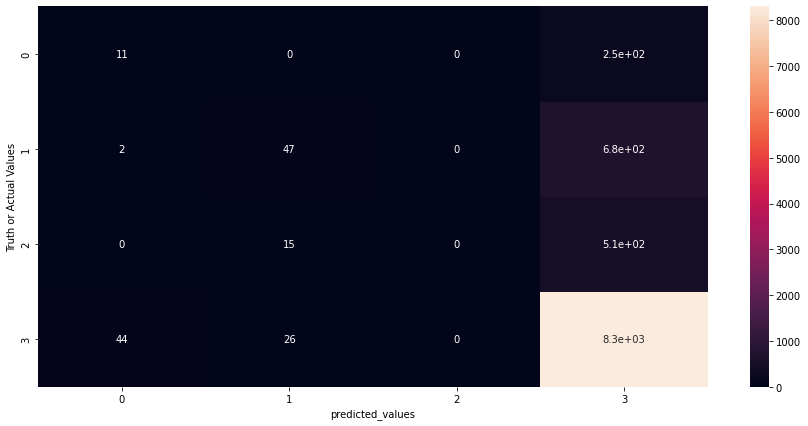

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_GBL,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("GradientBoostingClassifier confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_GBL))

GradientBoostingClassifier confusion matrix


,0,1,2,3
0,11,0,0,253
1,2,47,0,680
2,0,15,0,508
3,44,26,0,8302


#K-fold CrossValidation on GradientBoostClassifier

In [ ]:
val_score=cross_val_score(m,X_train,y_train.ravel(),cv=5)

In [ ]:
val_score

array([0.84173935, 0.84336283, 0.84197219, 0.84310999, 0.84197219])

In [ ]:
val_score.mean()

0.8424313087395634

In [ ]:
val_score.std()

0.000667642398246251

#Support_Vector_Machine Classifier

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = OneVsRestClassifier(SVC())

svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
svc.estimators_

[SVC(), SVC(), SVC(), SVC()]

In [ ]:
svc.classes_, svc.multilabel_

(array([0, 1, 2, 3], dtype=int8), False)

In [ ]:
svc.score(X_train, y_train)

0.8471087962377689

In [ ]:
svc.score(X_test,y_test)

0.8470873786407767

In [ ]:
pred_svc=svc.predict(X_test)

In [ ]:
pred_svc

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

#Classification Report

In [ ]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.83      0.01      0.01       729
           2       0.00      0.00      0.00       523
           3       0.85      1.00      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.42      0.25      0.23      9888
weighted avg       0.78      0.85      0.78      9888



In [ ]:
accuracy_score(y_test,pred_svc)

0.8470873786407767

In [ ]:
mean_squared_error(y_test,pred_svc)

0.5864684466019418

In [ ]:
r2_score(y_test,pred_svc)

-0.15120343954191084

In [ ]:
#See the output inconfusion matrix
cm_svc=confusion_matrix(y_test,pred_svc)
cm_svc

array([[   0,    0,    0,  264],
       [   0,    5,    0,  724],
       [   0,    0,    0,  523],
       [   0,    1,    0, 8371]])

Text(114.0, 0.5, 'Truth or Actual Values')

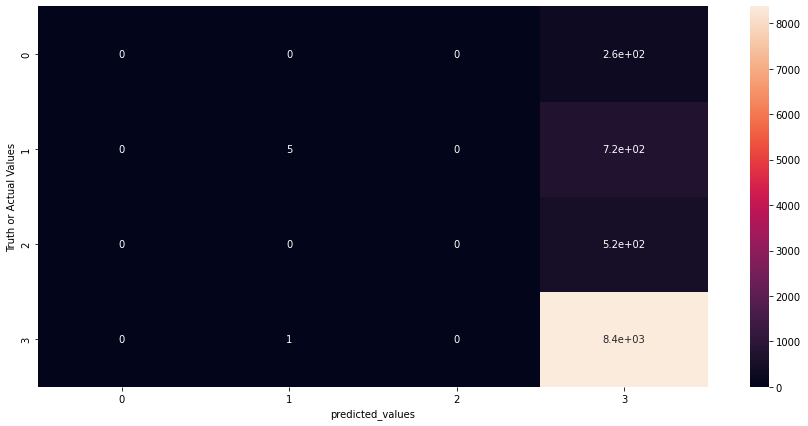

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_svc,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("SupportVector Machine confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_svc))

SupportVector Machine confusion matrix


,0,1,2,3
0,0,0,0,264
1,0,5,0,724
2,0,0,0,523
3,0,1,0,8371


#K-fold crossvalidation on svc

In [ ]:
val_score=cross_val_score(svc,X_train,y_train.ravel(),cv=3)

In [ ]:
val_score

array([0.84587379, 0.84587379, 0.8458621 ])

In [ ]:
val_score.mean()

0.84586988931268

In [ ]:
val_score.std()

0.001201398308708862

#DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 1], [2], [0, 1, 3], [0, 1, 2, 3], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0]])

In [ ]:
dt= OneVsRestClassifier(DecisionTreeClassifier(max_depth = 5,
        min_samples_split = 7,
        min_samples_leaf = 3,
        ccp_alpha =  0.01))

dt.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                     max_depth=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=7))

In [ ]:
print(f'Score on dt training set: {dt.score(X_train, y_train)}')
print(f'Score on dt testing set: {dt.score(X_test, y_test)}')

Score on dt training set: 0.8459204571312988
Score on dt testing set: 0.8466828478964401


In [ ]:
pred_dt = dt.predict(X_test)

In [ ]:
pred_dt

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1236
           1       0.00      0.00      0.00       729
           2       0.00      0.00      0.00       512
           3       0.85      1.00      0.92      8382

    accuracy                           0.86     10859
   macro avg       0.46      0.45      0.45     10859
weighted avg       0.77      0.86      0.81     10859



In [ ]:
accuracy_score(y_test,pred_dt)

0.8466828478964401

In [ ]:
mean_squared_error(y_test,pred_dt)

0.5154249930932867

In [ ]:
r2_score(y_test,pred_dt)

0.5167944893581424

In [ ]:
#See the output inconfusion matrix
cm_dt=confusion_matrix(y_test,pred_dt)
cm_dt

array([[ 995,    0,    0,  241],
       [   0,    0,    0,  729],
       [   0,    1,    0,  511],
       [   0,    0,    0, 8382]])

Text(114.0, 0.5, 'Truth or Actual Values')

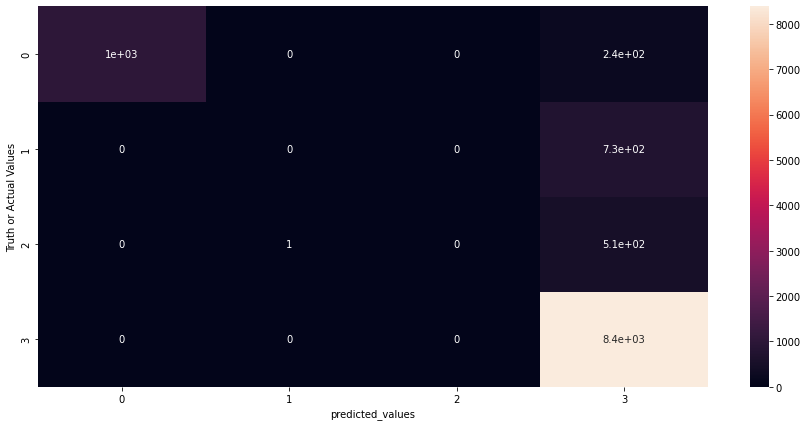

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_dt,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("Decision Tree confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_dt))

Decision Tree confusion matrix


,0,1,2,3
0,995,0,0,241
1,0,0,0,729
2,0,1,0,511
3,0,0,0,8382


#GridsearchCV with D Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {
        'max_depth' : [2, 3, 5, 7],
        'min_samples_split' : [5, 10, 15, 20],
        'min_samples_leaf' : [2, 3, 4, 5, 6],
        'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
    },
    cv = 5,
    verbose = 1
)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [ ]:
grid.best_score_

0.845920457376557

In [ ]:
# Evaluate model.
print(f'Score on gd training set: {grid.score(X_train, y_train)}')
print(f'Score on gd testing set: {grid.score(X_test, y_test)}')

Score on gd training set: 0.8459204571312988
Score on gd testing set: 0.8466828478964401


In [ ]:
pred_grid=grid.predict(X_test)

In [ ]:
pred_grid

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
print(classification_report(y_test,pred_grid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.00      0.00      0.00       729
           2       0.00      0.00      0.00       523
           3       0.85      1.00      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.21      0.25      0.23      9888
weighted avg       0.72      0.85      0.78      9888



In [ ]:
accuracy_score(y_test,pred_grid)

0.8466828478964401

In [ ]:
mean_squared_error(y_test,pred_grid)

0.5880865695792881

In [ ]:
r2_score(y_test,pred_grid)

-0.1543797208029336

In [ ]:
#See the output inconfusion matrix
cm_grid=confusion_matrix(y_test,pred_grid)
cm_grid

array([[   0,    0,    0,  264],
       [   0,    0,    0,  729],
       [   0,    0,    0,  523],
       [   0,    0,    0, 8372]])

Text(114.0, 0.5, 'Truth or Actual Values')

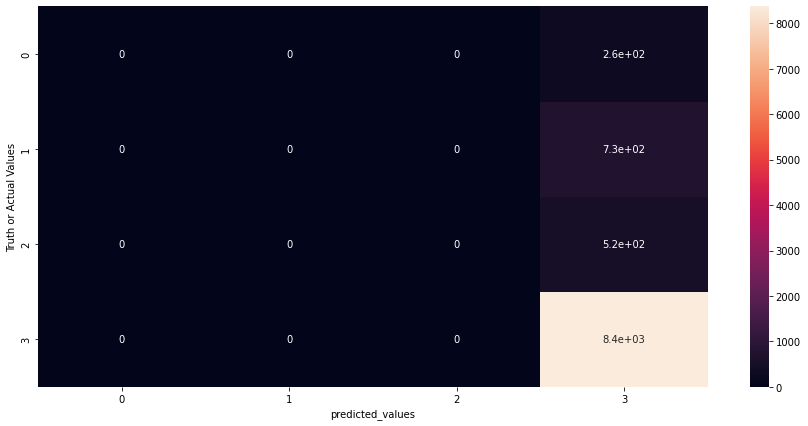

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_grid,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("gridsearchcv on dt confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_svc))

gridsearchcv on dt confusion matrix


,0,1,2,3
0,0,0,0,264
1,0,5,0,724
2,0,0,0,523
3,0,1,0,8371


#VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[2, 3, 1], [2], [0, 1, 3], [0, 1, 2, 3], [0, 1, 2]]

MultiLabelBinarizer().fit_transform(y)

array([[0, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


p = VotingClassifier(
    estimators=[('ada', AdaBoostClassifier()),
                ('rf', RandomForestClassifier()),
                ('gnb', GaussianNB())],
    voting='hard')

In [ ]:
p.fit(X_train,y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())])

In [ ]:
p.score(X_train, y_train)

0.9019493818108265

In [ ]:
p.score(X_test,y_test)

0.8456715210355987

In [ ]:
pred_voting = p.predict(X_test)

In [ ]:
pred_voting

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [ ]:
print(classification_report(y_test,pred_voting))

              precision    recall  f1-score   support

           0       0.20      0.10      0.13       264
           1       0.50      0.14      0.22       729
           2       0.33      0.00      0.00       523
           3       0.86      0.98      0.92      8372

    accuracy                           0.85      9888
   macro avg       0.47      0.31      0.32      9888
weighted avg       0.79      0.85      0.80      9888



In [ ]:
accuracy_score(y_test,pred_voting)

0.8456715210355987

In [ ]:
mean_squared_error(y_test,pred_voting)

0.5975930420711975

In [ ]:
r2_score(y_test,pred_voting)

-0.17304037321144183

In [ ]:
#See the output inconfusion matrix
cm_voting=confusion_matrix(y_test,pred_voting)
cm_voting

array([[  26,    0,    0,  238],
       [  39,  104,    0,  586],
       [  13,   16,    1,  493],
       [  53,   86,    2, 8231]])

Text(114.0, 0.5, 'Truth or Actual Values')

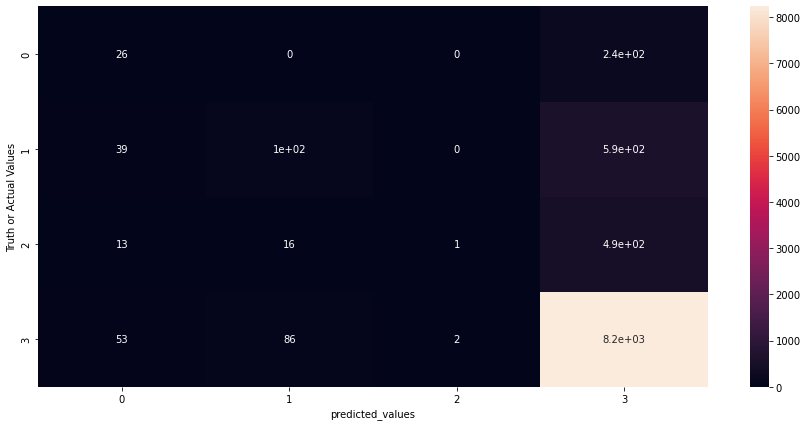

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_voting,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("VotingClassifier confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_voting))

VotingClassifier confusion matrix


,0,1,2,3
0,26,0,0,238
1,39,104,0,586
2,13,16,1,493
3,53,86,2,8231


#cross_validation on votingClassifier

In [ ]:
val_score=cross_val_score(p,X_train,y_train.ravel(),cv=5)

In [ ]:
val_score

array([0.83857919, 0.84728192, 0.84070796, 0.84589128, 0.84361568])

In [ ]:
val_score.mean()

0.8432152065943483

In [ ]:
val_score.std()

0.0032136825845255085

In [ ]:
print("Logi:",accuracy_score(y_test,pred_L))
print("voting:",accuracy_score(y_test,pred_voting))
print("dt:",accuracy_score(y_test,pred_dt))
print("dtgrid:",accuracy_score(y_test,pred_grid))
print("svm:",accuracy_score(y_test,pred_svc))
print("xgb:",accuracy_score(y_test,pred_GBL))
print("bag:",accuracy_score(y_test,pred_bag))

Logi: 0.8462783171521036
voting: 0.8456715210355987
dt: 0.8466828478964401
dtgrid: 0.8466828478964401
svm: 0.8470873786407767
xgb: 0.8454692556634305
bag: 0.8467839805825242
